# 🧠 Smoking Status Prediction from Bio-Signals

## 📌 Introduction

In this project, we aim to predict an individual's smoking status based on various biometric signals and medical test results. The dataset used for this task was synthetically generated using a deep learning model trained on the original *Smoker Status Prediction using Bio-Signals* dataset. While the feature distributions closely resemble those of the original dataset, slight variations exist due to the generation process.

The primary goal of this notebook is to build a machine learning model that can accurately classify individuals as smokers or non-smokers based on their health profile. This involves understanding the dataset, performing exploratory data analysis (EDA), preprocessing the data, building and evaluating classification models, and optionally comparing results when incorporating the original dataset.

## 🎯 Objective

- Predict the `smoking` status (0: non-smoker, 1: smoker) using 23 biomedical features.
- Explore data patterns and correlations that may indicate smoking behavior.
- Evaluate multiple models and determine the most effective approach for classification.
- Experiment with incorporating the original dataset to enhance performance.

## 🧾 Dataset Overview

The dataset includes the following types of features:
- **Demographic Data** (e.g., age, height, weight)
- **Vision & Hearing Tests**
- **Blood Pressure & Blood Tests**
- **Liver & Kidney Function Indicators**
- **Urine & Dental Health Markers**

With this notebook, we aim not only to achieve high classification performance but also to gain meaningful insights from health data that could contribute to public health research.

---


# Data Exploration

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [99]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("demonickelodeon/binary-prediction-of-smoker-status")

# print("Path to dataset files:", path)

In [100]:
df = pd.read_csv('train.csv')

In [101]:
print("Features Info:")
print("-" * 50)
df.info()

Features Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HD

In [102]:
# data spliting
X = df.drop(columns=['id', 'smoking'])
y = df['smoking']

In [103]:
print("\nDataset Shape:", df.shape)
print("\nMissing Values:")
print(X.isnull().sum())


Dataset Shape: (159256, 24)

Missing Values:
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64


In [104]:
X.drop_duplicates(inplace=True)
print(f"\nShape after removing duplicates: {df.shape}")



Shape after removing duplicates: (159256, 24)


In [105]:
print("Statistical Summary of Numerical Columns:")
print("-" * 50)
print(X.describe())

Statistical Summary of Numerical Columns:
--------------------------------------------------
                 age     height(cm)     weight(kg)      waist(cm)  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean       44.306626     165.266929      67.143662      83.001990   
std        11.842286       8.818970      12.586198       8.957937   
min        20.000000     135.000000      30.000000      51.000000   
25%        40.000000     160.000000      60.000000      77.000000   
50%        40.000000     165.000000      65.000000      83.000000   
75%        55.000000     170.000000      75.000000      89.000000   
max        85.000000     190.000000     130.000000     127.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count   159256.000000    159256.000000  159256.000000   159256.000000   
mean         1.005798         1.000989       1.023974        1.023421   
std          0.402113         0.392299       0.152969        0.151

In [106]:
X.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [107]:
continuous_cols = [
    'height(cm)', 'weight(kg)', 'waist(cm)',
    'eyesight(left)', 'eyesight(right)',
    'systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]


In [108]:
categorical_cols = [
    'age', 'hearing(left)', 'hearing(right)',
    'Urine protein', 'dental caries'
]


In [109]:
# check data balance
df['smoking'].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

## EDA

C:\Users\DELL\AppData\Local\Temp\ipykernel_16136\2951070884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoking', palette='coolwarm')


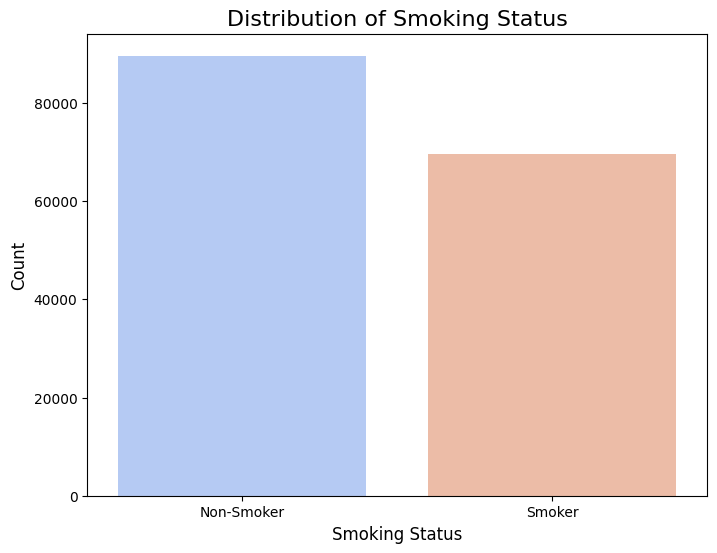

In [110]:
#smoking status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking', palette='coolwarm')
plt.title('Distribution of Smoking Status', fontsize=16)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()

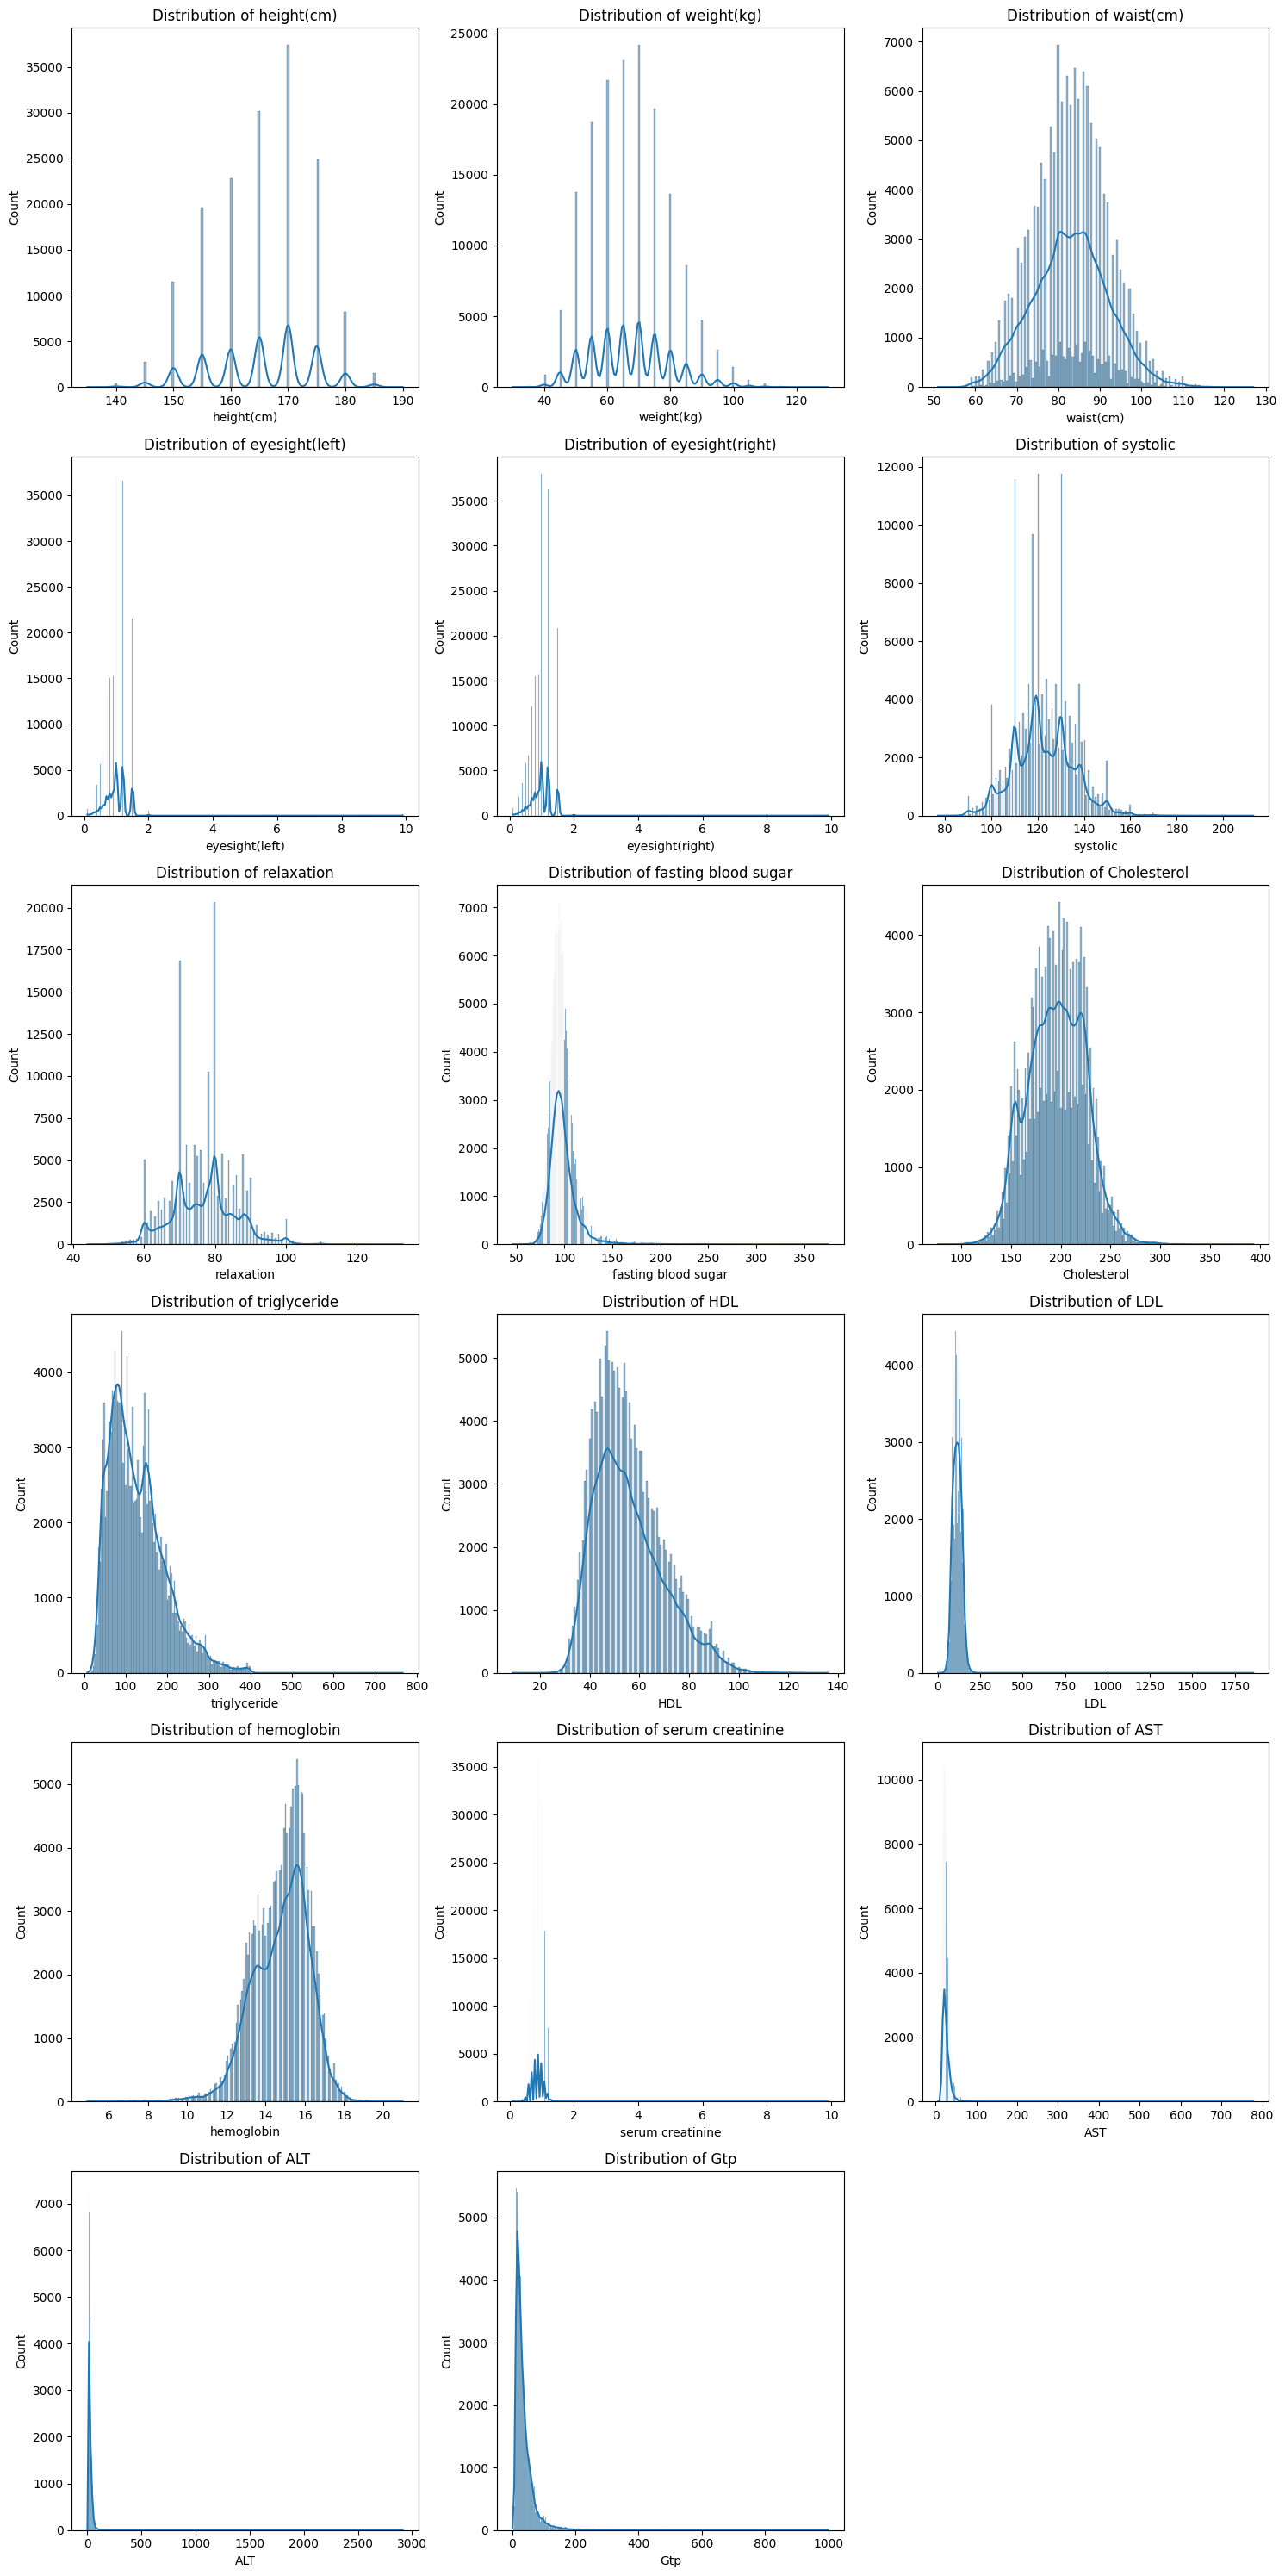

In [111]:
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=X, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

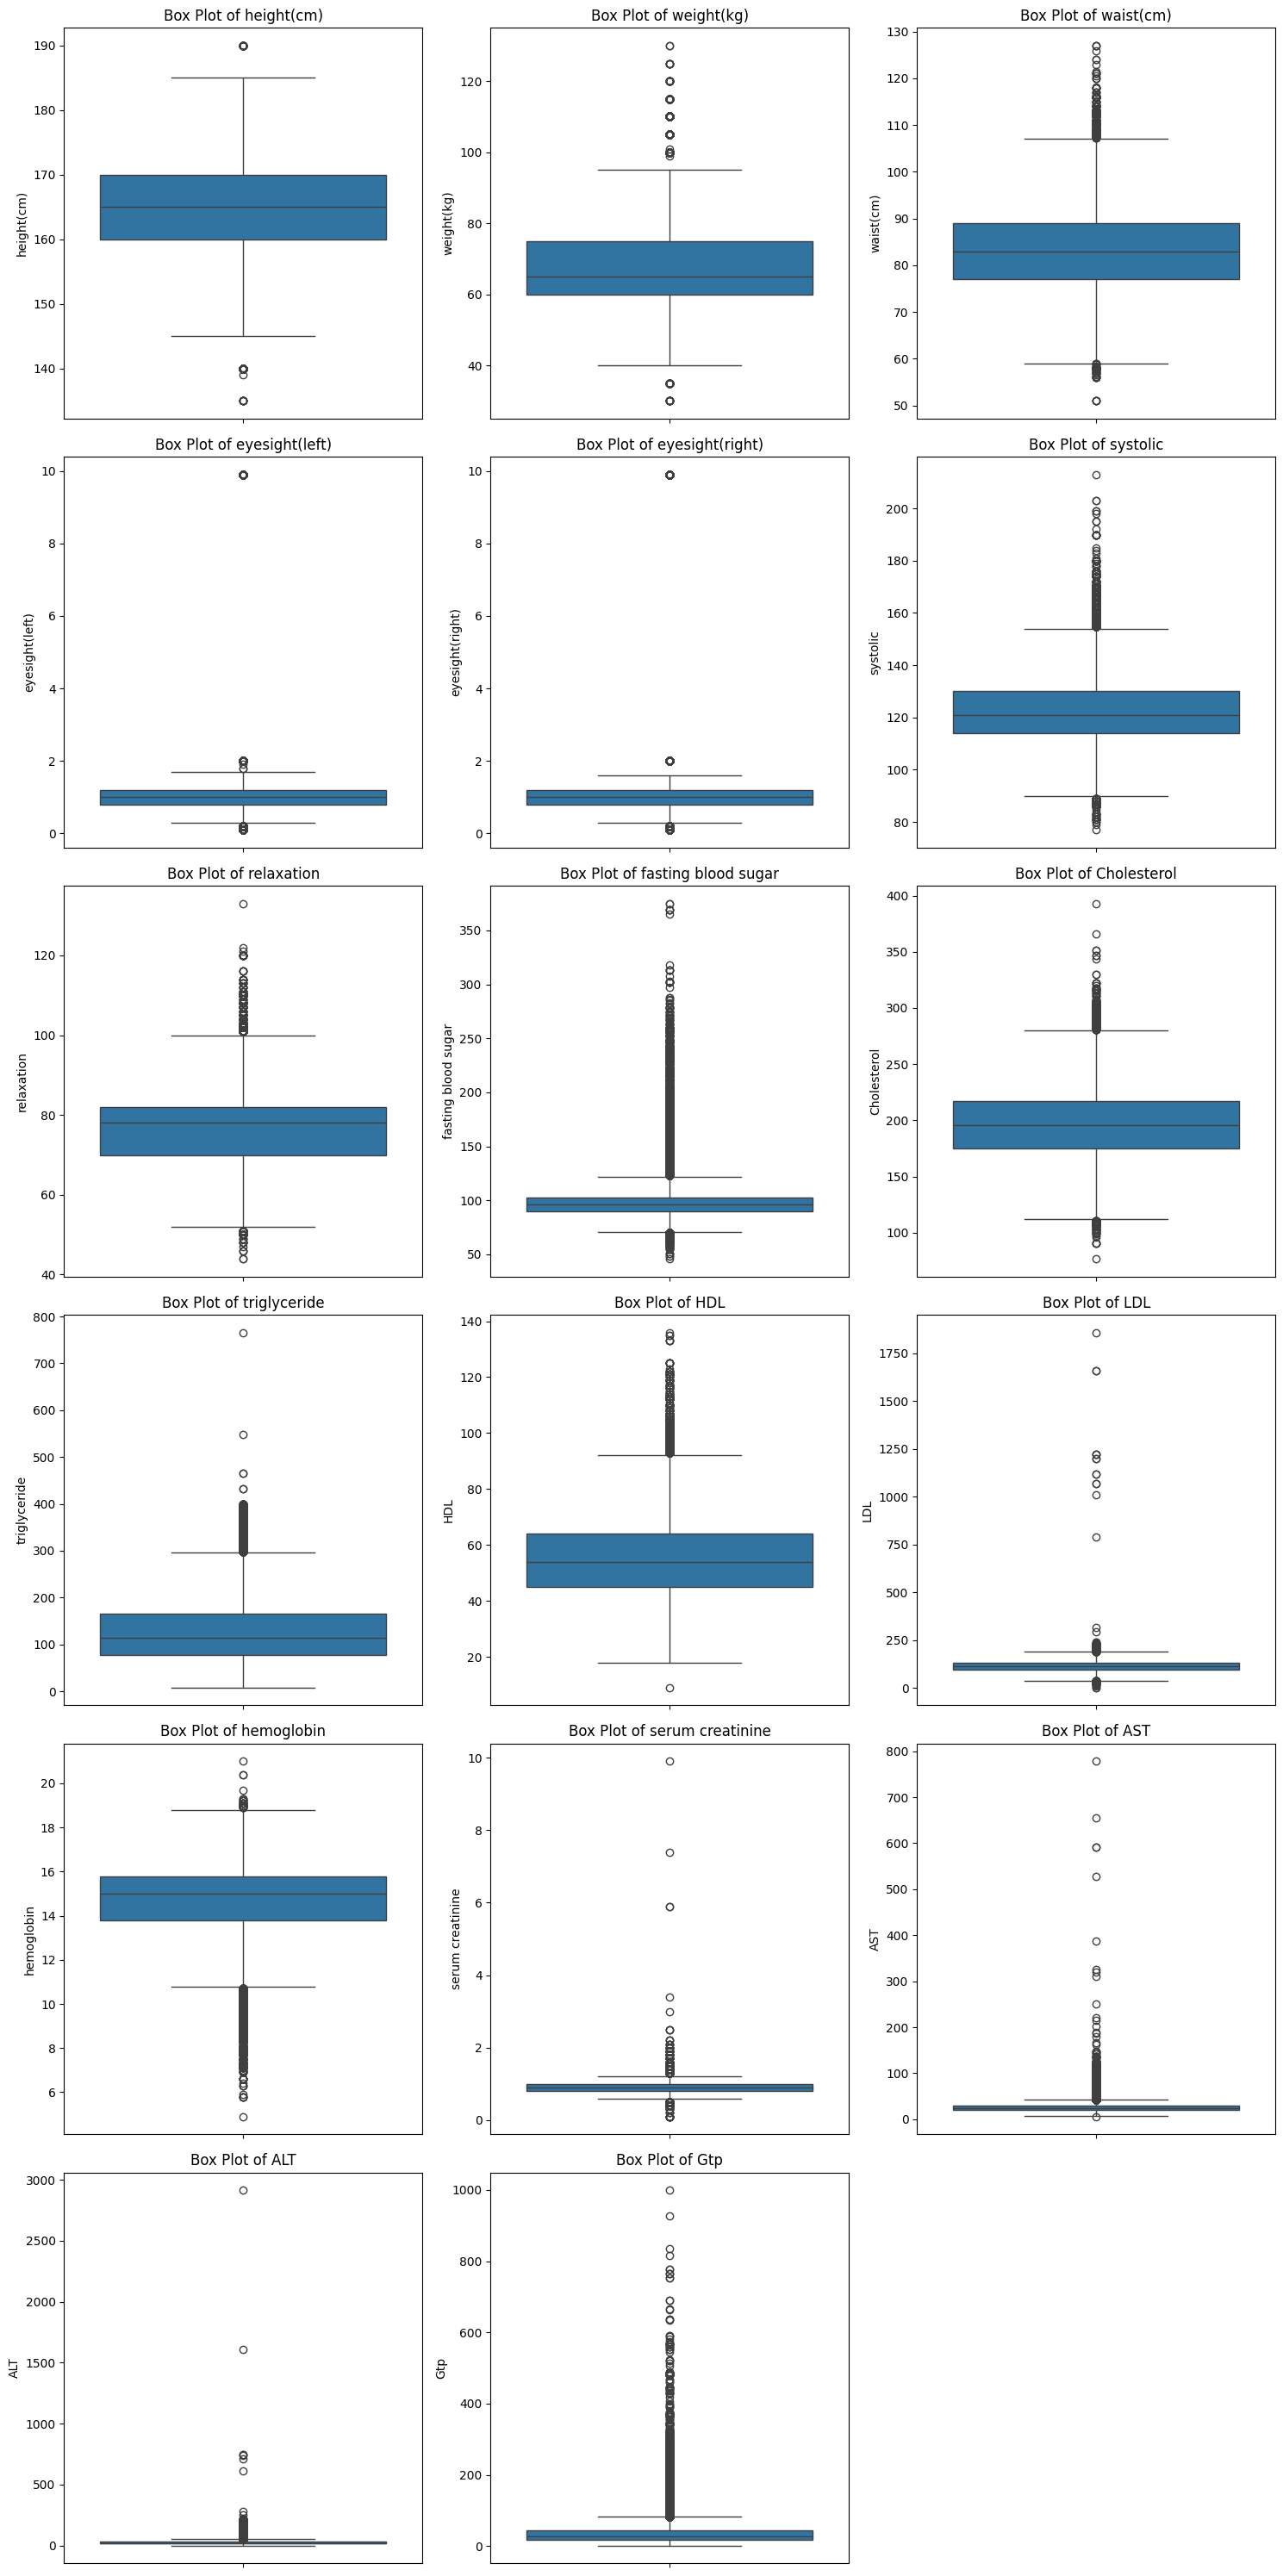

In [112]:
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Outliers
### first appling boxcox to handle the dist of the data and fix the skew


In [113]:
from scipy.stats import boxcox

# Define the percentile bounds for Winsorization (e.g., 1st and 99th percentiles)
lower_percentile = 1
upper_percentile = 99

# Ensure all continuous columns are positive (Box-Cox requirement)
X[continuous_cols] = X[continuous_cols] + 1e-9  # Only if values ≤ 0 exist

# Winsorize the continuous columns
for col in continuous_cols:
    lower_limit = np.percentile(X[col], lower_percentile)
    upper_limit = np.percentile(X[col], upper_percentile)
    
    # Cap the extreme values
    X[col] = np.clip(X[col], lower_limit, upper_limit)

# Apply Box-Cox to each continuous column
for col in continuous_cols:
    X[col], _ = boxcox(X[col])  # Apply Box-Cox transformation

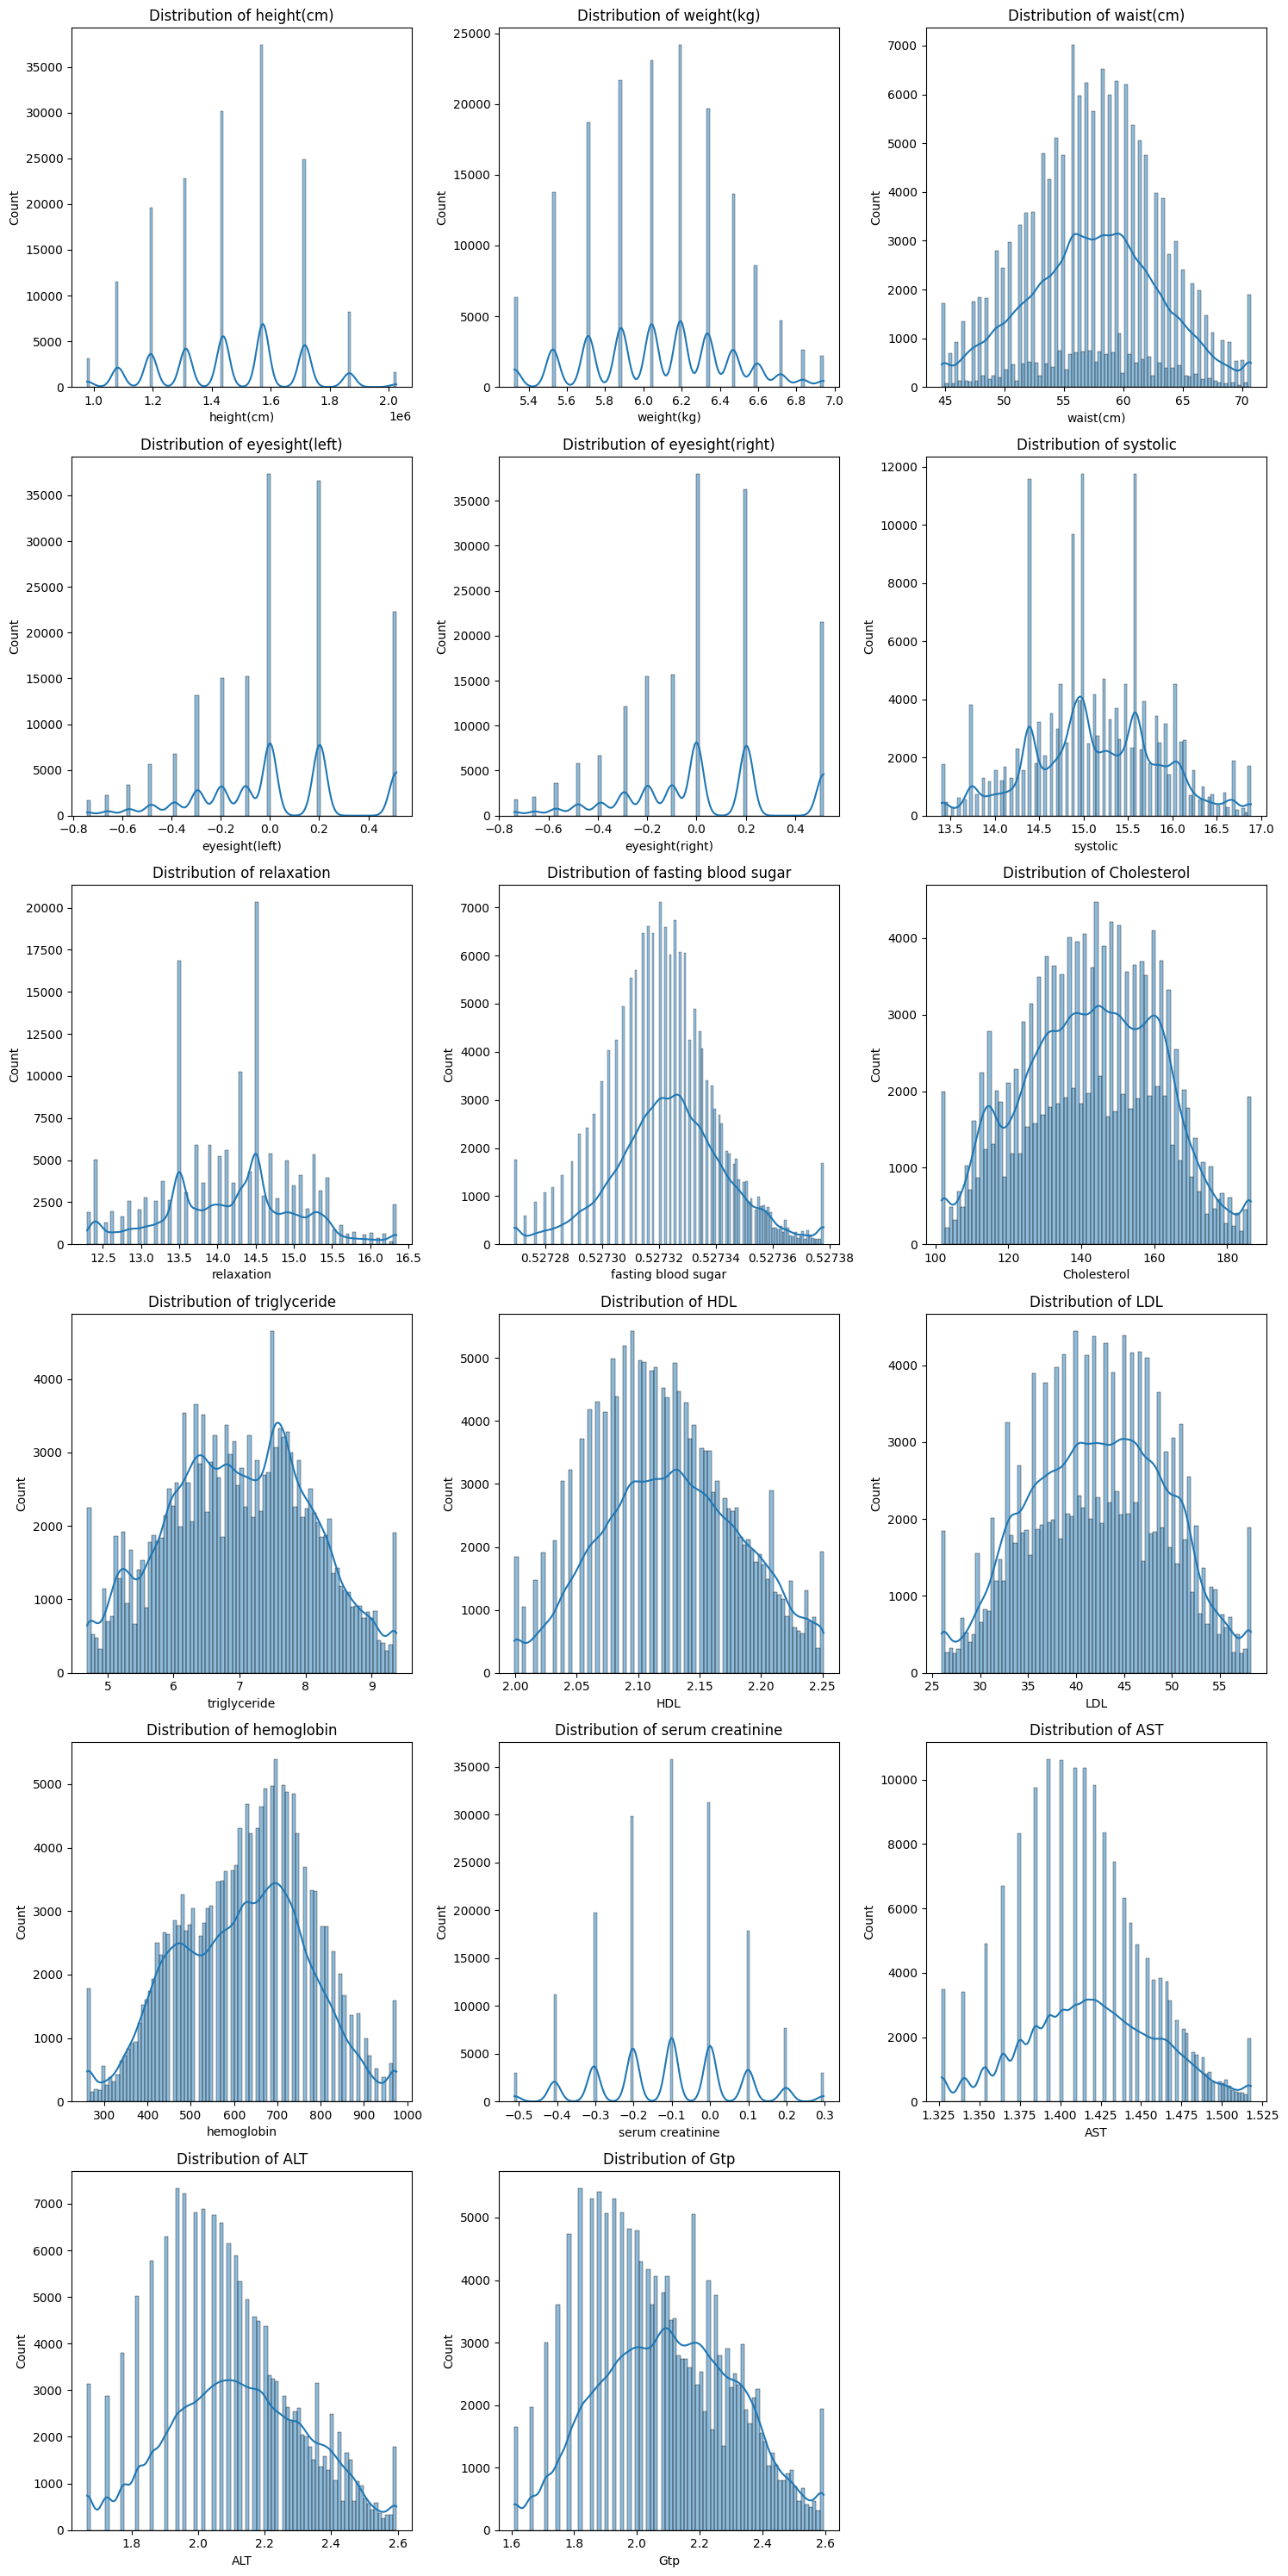

In [114]:
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=X, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [115]:
def impute_outliers_with_bounds(X, continuous_cols):
    # Calculate Q1, Q3, and IQR
    Q1 = X[continuous_cols].quantile(0.25)
    Q3 = X[continuous_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Loop through each continuous column and impute outliers
    for col in continuous_cols:
        # Detect outliers (those outside the bounds)
        outliers_lower = X[col] < lower_bound[col]
        outliers_upper = X[col] > upper_bound[col]

        # Impute the lower outliers with the lower bound
        X[col] = np.where(outliers_lower, lower_bound[col], X[col])

        # Impute the upper outliers with the upper bound
        X[col] = np.where(outliers_upper, upper_bound[col], X[col])

    return X

X = impute_outliers_with_bounds(X, continuous_cols)

## Feature Engineering

In [116]:
#adding new features
X['BMI'] = X['weight(kg)'] / ((X['height(cm)'] / 100) ** 2)
X['WHR'] = X['waist(cm)'] / X['height(cm)']
X['Metabolic_Health'] = (X['fasting blood sugar'] + X['triglyceride'] + X['Cholesterol'] - X['HDL'] + X['LDL']) / 4
X['Hemoglobin_Height_Ratio'] = X['hemoglobin'] / X['height(cm)']

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      159256 non-null  int64  
 1   height(cm)               159256 non-null  float64
 2   weight(kg)               159256 non-null  float64
 3   waist(cm)                159256 non-null  float64
 4   eyesight(left)           159256 non-null  float64
 5   eyesight(right)          159256 non-null  float64
 6   hearing(left)            159256 non-null  int64  
 7   hearing(right)           159256 non-null  int64  
 8   systolic                 159256 non-null  float64
 9   relaxation               159256 non-null  float64
 10  fasting blood sugar      159256 non-null  float64
 11  Cholesterol              159256 non-null  float64
 12  triglyceride             159256 non-null  float64
 13  HDL                      159256 non-null  float64
 14  LDL 

## Taling sample from the data to train the model

In [118]:
sample_frac = 0.1
X_sampled = X.sample(frac=sample_frac, random_state=42)
y_sampled = y.loc[X_sampled.index]


## Spliting data into trainning and validation

In [119]:
X_train, X_val, y_train, y_val = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12740 entries, 136488 to 21656
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      12740 non-null  int64  
 1   height(cm)               12740 non-null  float64
 2   weight(kg)               12740 non-null  float64
 3   waist(cm)                12740 non-null  float64
 4   eyesight(left)           12740 non-null  float64
 5   eyesight(right)          12740 non-null  float64
 6   hearing(left)            12740 non-null  int64  
 7   hearing(right)           12740 non-null  int64  
 8   systolic                 12740 non-null  float64
 9   relaxation               12740 non-null  float64
 10  fasting blood sugar      12740 non-null  float64
 11  Cholesterol              12740 non-null  float64
 12  triglyceride             12740 non-null  float64
 13  HDL                      12740 non-null  float64
 14  LDL                   

## Outliers

### first appling boxcox to handle the dist of the data and fix the skew 

In [121]:
# from scipy.stats import boxcox

# # Define the percentile bounds for Winsorization (e.g., 1st and 99th percentiles)
# lower_percentile = 1
# upper_percentile = 99

# # Ensure all continuous columns are positive (Box-Cox requirement)
# X[continuous_cols] = X[continuous_cols] + 1e-9  # Only if values ≤ 0 exist

# # Winsorize the continuous columns
# for col in continuous_cols:
#     lower_limit = np.percentile(X_train[col], lower_percentile)
#     upper_limit = np.percentile(X_train[col], upper_percentile)
    
#     # Cap the extreme values
#     X_train[col] = np.clip(X_train[col], lower_limit, upper_limit)

# # Apply Box-Cox to each continuous column
# for col in continuous_cols:
#     X_train[col], _ = boxcox(X_train[col])  # Apply Box-Cox transformation


In [122]:
# n_cols = 3
# n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

# plt.figure(figsize=(15, 5*n_rows))
# for i, col in enumerate(continuous_cols, 1):
#     plt.subplot(n_rows, n_cols, i)
#     sns.histplot(data=X_train, x=col, kde=True)
#     plt.title(f'Distribution of {col}')
# plt.tight_layout()
# plt.show()

In [123]:
# def impute_outliers_with_bounds(X, continuous_cols):
#     # Calculate Q1, Q3, and IQR
#     Q1 = X_train[continuous_cols].quantile(0.25)
#     Q3 = X_train[continuous_cols].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Loop through each continuous column and impute outliers
#     for col in continuous_cols:
#         # Detect outliers (those outside the bounds)
#         outliers_lower = X_train[col] < lower_bound[col]
#         outliers_upper = X_train[col] > upper_bound[col]

#         # Impute the lower outliers with the lower bound
#         X_train[col] = np.where(outliers_lower, lower_bound[col], X_train[col])

#         # Impute the upper outliers with the upper bound
#         X_train[col] = np.where(outliers_upper, upper_bound[col], X_train[col])

#     return X

# X_train = impute_outliers_with_bounds(X_train, continuous_cols)


In [124]:
from scipy.stats import skew

# Compute skewness for each continuous feature before dealing with outliers
before_skew = X[continuous_cols].apply(lambda x: skew(x, nan_policy='omit'))
print("Skewness Before Handling Outliers:")
print(before_skew)

Skewness Before Handling Outliers:
height(cm)            -0.074513
weight(kg)            -0.005811
waist(cm)             -0.012295
eyesight(left)        -0.058274
eyesight(right)       -0.056628
systolic              -0.004937
relaxation            -0.005506
fasting blood sugar   -0.016666
Cholesterol           -0.028791
triglyceride          -0.018296
HDL                    0.018408
LDL                   -0.036575
hemoglobin            -0.051230
serum creatinine      -0.016199
AST                    0.023159
ALT                    0.023648
Gtp                    0.038015
dtype: float64


In [125]:

# Compute skewness for each continuous feature after dealing with outliers
after_skew = X_train[continuous_cols].apply(lambda x: skew(x, nan_policy='omit'))
print("Skewness After Handling Outliers:")
print(after_skew)

Skewness After Handling Outliers:
height(cm)            -0.083068
weight(kg)            -0.021304
waist(cm)             -0.024530
eyesight(left)        -0.075983
eyesight(right)       -0.059028
systolic              -0.015223
relaxation            -0.003898
fasting blood sugar   -0.008806
Cholesterol           -0.025254
triglyceride          -0.036927
HDL                    0.030448
LDL                   -0.055129
hemoglobin            -0.037358
serum creatinine      -0.023182
AST                    0.018558
ALT                    0.029099
Gtp                    0.026860
dtype: float64


In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12740 entries, 136488 to 21656
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      12740 non-null  int64  
 1   height(cm)               12740 non-null  float64
 2   weight(kg)               12740 non-null  float64
 3   waist(cm)                12740 non-null  float64
 4   eyesight(left)           12740 non-null  float64
 5   eyesight(right)          12740 non-null  float64
 6   hearing(left)            12740 non-null  int64  
 7   hearing(right)           12740 non-null  int64  
 8   systolic                 12740 non-null  float64
 9   relaxation               12740 non-null  float64
 10  fasting blood sugar      12740 non-null  float64
 11  Cholesterol              12740 non-null  float64
 12  triglyceride             12740 non-null  float64
 13  HDL                      12740 non-null  float64
 14  LDL                   

## Feature Selection

In [127]:
corr_matrix = X_train.corr()

# Optional: Include the target variable "smoking" in the matrix
# (if "smoking" is not already in X_cleaned)
corr_matrix = pd.concat([X_train, df['smoking']], axis=1).corr()

In [128]:
corr_matrix = pd.concat([X_train, df['smoking']], axis=1).corr()

# Extract only the row (or column) that shows correlation with 'smoking'
smoking_corr = corr_matrix[['smoking']].drop('smoking')  # Drop self-correlation


In [129]:
smoking_corr

,smoking
age,-0.215647
height(cm),0.437061
weight(kg),0.349243
waist(cm),0.254180
eyesight(left),0.125918
eyesight(right),0.143023
hearing(left),-0.046642
hearing(right),-0.048293
systolic,0.053717
relaxation,0.104277


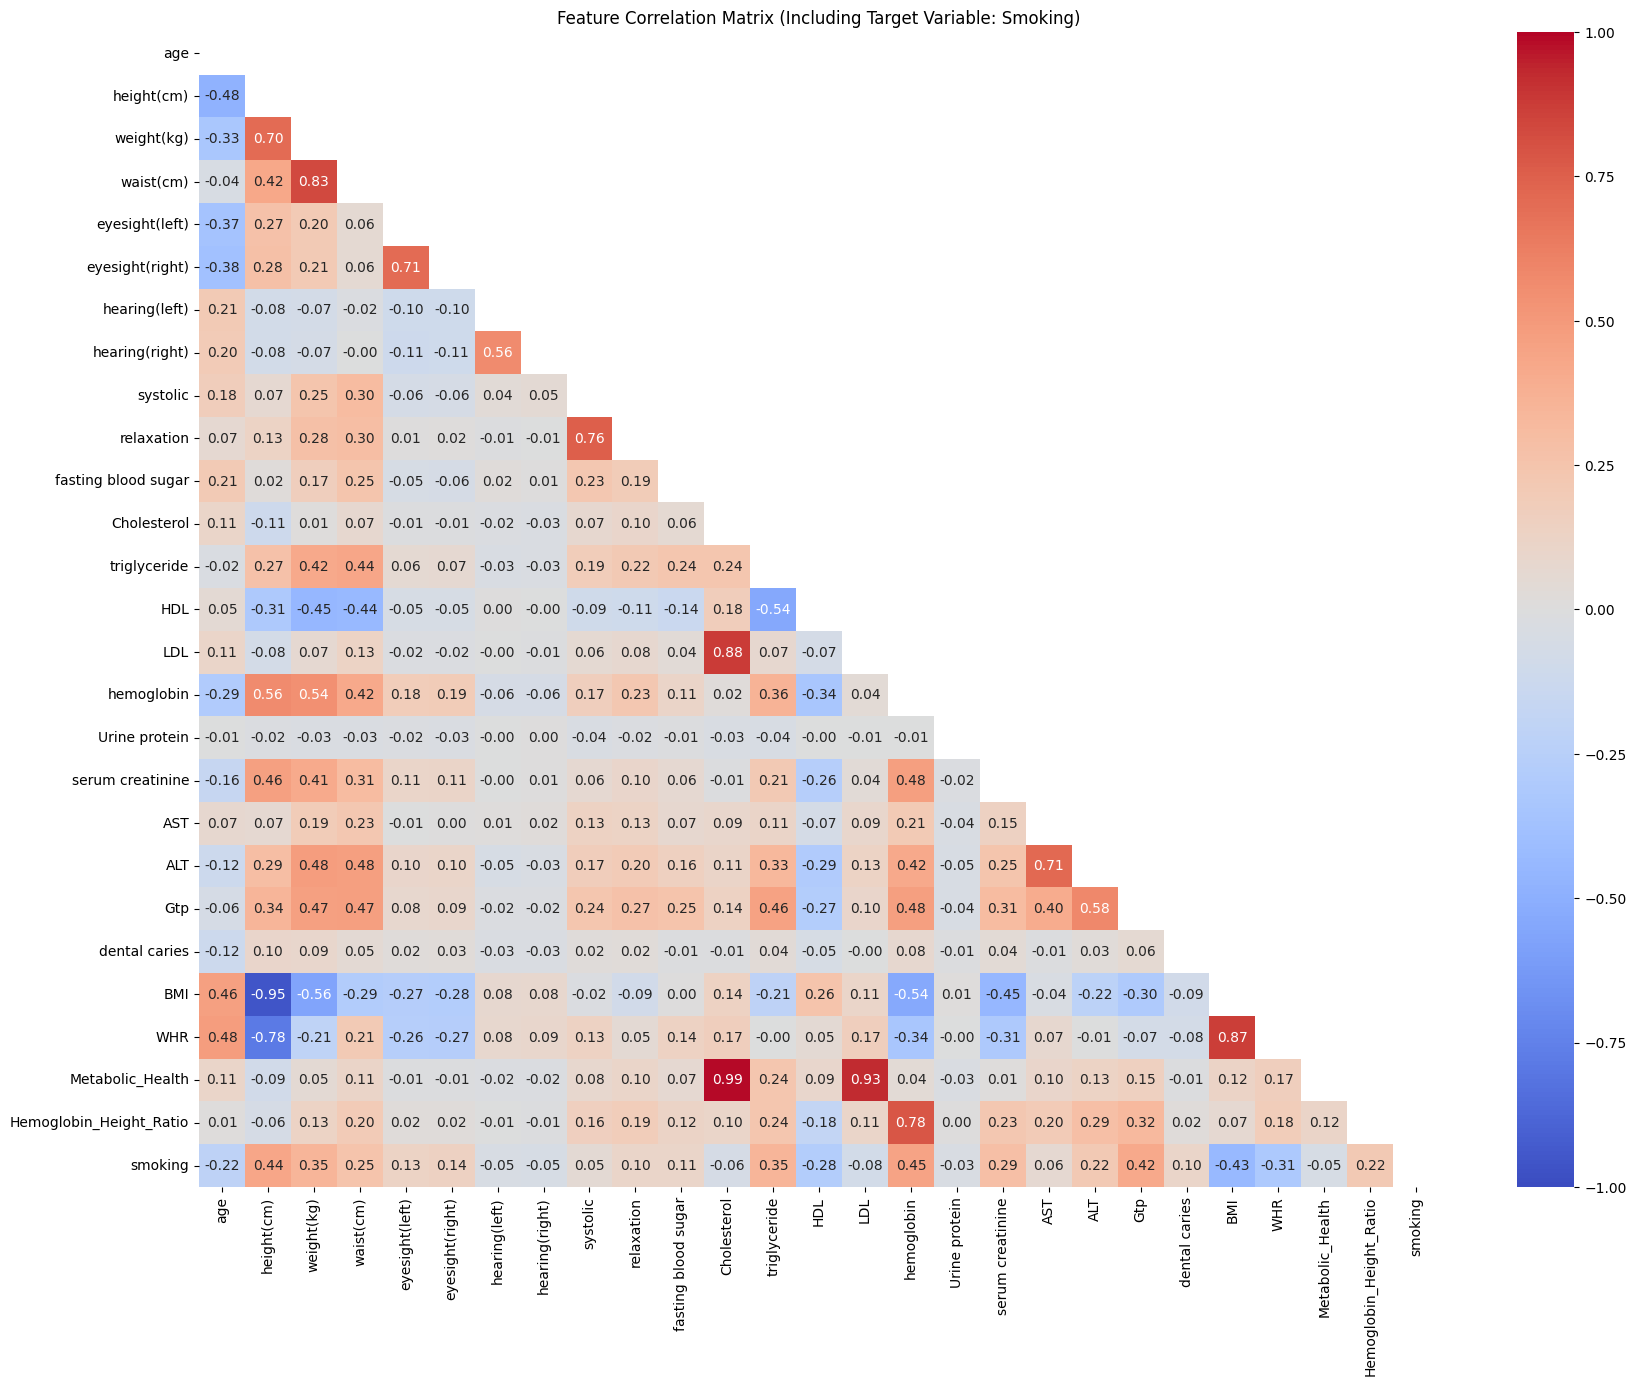

In [130]:
# Combine features with the target
corr_matrix = pd.concat([X_train, df['smoking']], axis=1).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the full heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show the correlation values
    cmap='coolwarm',  # Color gradient
    fmt=".2f",        # Decimal precision
    vmin=-1, vmax=1,  # Correlation range
    mask=mask         # Hide upper triangle
)
plt.title("Feature Correlation Matrix (Including Target Variable: Smoking)")
plt.show()


## appling filter methods to drop the high correlated features

In [131]:
corr_matrix = X_train.corr().abs()

# Create a mask for the upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a threshold to identify highly correlated features
threshold = 0.85

# Find features to drop (one of each pair with correlation > threshold)
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop from both X_train and X_val
X_train.drop(columns=to_drop, inplace=True)
X_val.drop(columns=to_drop, inplace=True)

print("Dropped highly correlated features:", to_drop)

Dropped highly correlated features: ['LDL', 'BMI', 'WHR', 'Metabolic_Health']


In [132]:
# check variance of features
X_train.var().sort_values()

fasting blood sugar        3.820619e-10
Hemoglobin_Height_Ratio    7.738204e-09
AST                        1.744847e-03
HDL                        3.269894e-03
hearing(right)             2.239637e-02
hearing(left)              2.389192e-02
serum creatinine           3.044299e-02
ALT                        4.370196e-02
Gtp                        4.808145e-02
eyesight(right)            8.991638e-02
eyesight(left)             9.102084e-02
Urine protein              1.193944e-01
weight(kg)                 1.421562e-01
dental caries              1.564935e-01
systolic                   5.476649e-01
relaxation                 7.629587e-01
triglyceride               1.154159e+00
waist(cm)                  3.178499e+01
age                        1.418544e+02
Cholesterol                3.604438e+02
hemoglobin                 2.302378e+04
height(cm)                 5.124377e+10
dtype: float64

## Scaling

In [133]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation set using the fitted scaler
X_val_scaled = scaler.transform(X_val)

## Applying Oversampling technique

In [134]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)


## PCA

In [135]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Fit PCA without limiting components to find how many are needed for 95% variance
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Step 2: Determine number of components to explain at least 95% of the variance
components_95 = np.argmax(pca_full.explained_variance_ratio_.cumsum() >= 0.95) + 1

# Step 3: Fit PCA with the selected number of components
pca = PCA(n_components=components_95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Step 4: Print results
print(f"Number of PCA components retained: {X_train_pca.shape[1]}")
print(f"Number of components to explain at least 95% variance: {components_95}")


Number of PCA components retained: 17
Number of components to explain at least 95% variance: 17


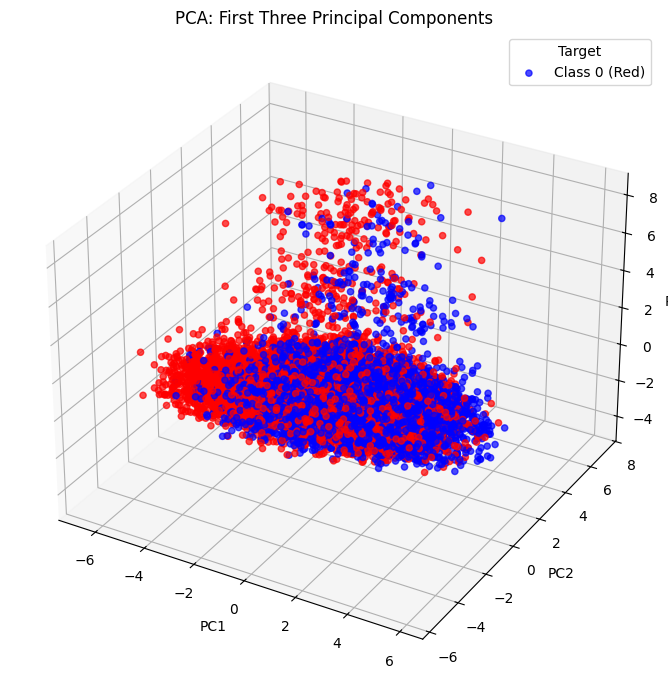

In [136]:
from mpl_toolkits.mplot3d import Axes3D


# Prepare a DataFrame with the first 3 principal components
pca_df_3d = pd.DataFrame(X_train_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['target'] = y_train.values

# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define color map manually
colors = pca_df_3d['target'].map({0: 'red', 1: 'blue'})

# Create scatter plot
scatter = ax.scatter(
    pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'],
    c=colors, alpha=0.7
)

# Set labels and title
ax.set_title("PCA: First Three Principal Components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Add custom legend
ax.legend(['Class 0 (Red)', 'Class 1 (Blue)'], title='Target')

plt.tight_layout()
plt.show()


# SVM model

In [137]:
# Define the parameter grid to search for the best 'C' value
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# Initialize the LinearSVC model
svc = LinearSVC(penalty='l1', dual=False, max_iter=2000, random_state=42 , class_weight='balanced')

# Use Stratified K-Fold cross-validation to ensure balanced folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Display the best results
print("Best C:", grid_search.best_params_['C'])
print("Best CV Accuracy:", grid_search.best_score_)

# Train the final model with the best 'C' value
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_val_pca)

# Evaluate the final model
print("Test Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Best C: 0.01
Best CV Accuracy: 0.7669870950553497
Test Accuracy: 0.756120527306968

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1797
           1       0.69      0.80      0.74      1389

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.77      0.76      0.76      3186



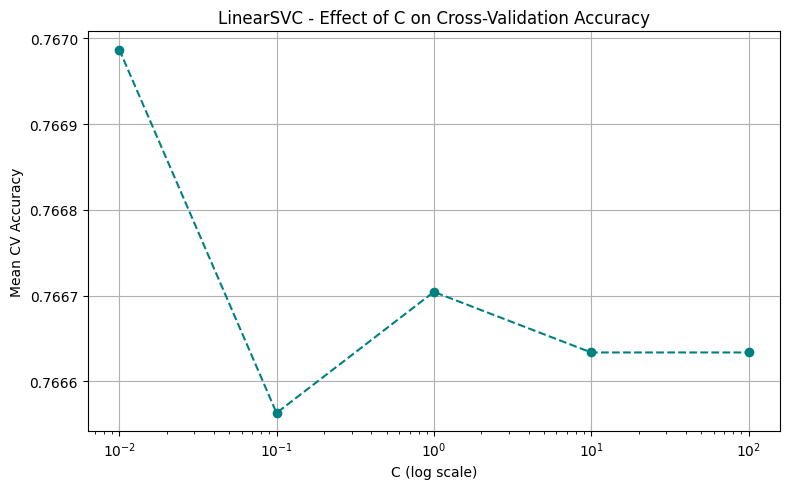

In [138]:

# Extract mean test scores and parameter values
mean_scores = grid_search.cv_results_['mean_test_score']
C_values = param_grid['C']

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(C_values, mean_scores, marker='o', linestyle='--', color='teal')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("C (log scale)")
plt.ylabel("Mean CV Accuracy")
plt.title("LinearSVC - Effect of C on Cross-Validation Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


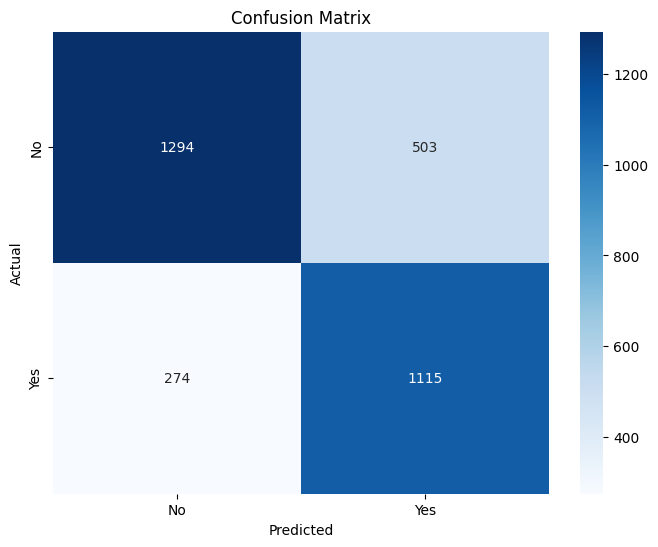

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [140]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform, randint


In [141]:


# Step 1: Define a parameter grid for RandomizedSearchCV using only relevant parameters for RBF
param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution from 0.1 to 10 for C
    'gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(5)),  # Different gamma values
}

# Step 2: Initialize the SVC model with RBF kernel only
svc = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Step 3: Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    svc, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy',
    random_state=42, n_jobs=-1, verbose=2
)

# Step 4: Fit RandomizedSearchCV with the training data
random_search.fit(X_train_pca, y_train)

# Step 5: Display the best hyperparameters and best score
print("Best hyperparameters found:", random_search.best_params_)
print("Best CV Accuracy from RandomizedSearchCV:", random_search.best_score_)

# Step 6: Train the final model with the best hyperparameters
best_svc_random_search = random_search.best_estimator_
y_pred_random_search = best_svc_random_search.predict(X_val_pca)

# Step 7: Evaluate the final model
print("Test Accuracy (Randomized Search):", accuracy_score(y_val, y_pred_random_search))
print("\nClassification Report (Randomized Search):\n", classification_report(y_val, y_pred_random_search))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found: {'C': 4.419450186421157, 'gamma': 'scale'}
Best CV Accuracy from RandomizedSearchCV: 0.7795616080640688
Test Accuracy (Randomized Search): 0.7567482736974263

Classification Report (Randomized Search):
               precision    recall  f1-score   support

           0       0.84      0.70      0.76      1797
           1       0.68      0.83      0.75      1389

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.77      0.76      0.76      3186



In [142]:
# # Poly kernel setup
# param_dist_poly = {
#     'C': uniform(0.1, 10),
#     'degree': randint(2, 5),       # degree of the polynomial
#     'coef0': uniform(0, 2),        # independent term
#     'gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(5)),
# }

# svc_poly = SVC(kernel='poly', class_weight='balanced', random_state=42)

# random_search_poly = RandomizedSearchCV(
#     svc_poly, param_distributions=param_dist_poly, n_iter=1, cv=5,
#     scoring='accuracy', random_state=42, n_jobs=-1, verbose=2
# )

# random_search_poly.fit(X_train_pca, y_train)

# best_svc_poly = random_search_poly.best_estimator_
# y_pred_poly = best_svc_poly.predict(X_val_pca)

# print("=== Polynomial Kernel ===")
# print("Best Params:", random_search_poly.best_params_)
# print("Accuracy:", accuracy_score(y_val, y_pred_poly))
# print("\n", classification_report(y_val, y_pred_poly))


# Comparing models

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [144]:
y_pred_rbf = best_svc_random_search.predict(X_val_pca)
y_pred_linear = best_svc.predict(X_val_pca)


In [145]:
def evaluate_model(y_true, y_pred, label):
    print(f"--- {label} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print(classification_report(y_true, y_pred))
    print("\n")


In [146]:
evaluate_model(y_val, y_pred_rbf, "SVC with RBF Kernel (Randomized Search)")
evaluate_model(y_val, y_pred_linear, "Linear SVC (Grid Search)")


--- SVC with RBF Kernel (Randomized Search) ---
Accuracy: 0.7567482736974263
Precision: 0.7715310511065986
Recall: 0.7567482736974263
F1 Score: 0.7575392642417759
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1797
           1       0.68      0.83      0.75      1389

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.77      0.76      0.76      3186



--- Linear SVC (Grid Search) ---
Accuracy: 0.756120527306968
Precision: 0.7659053342377784
Recall: 0.756120527306968
F1 Score: 0.7571085007345137
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1797
           1       0.69      0.80      0.74      1389

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.77      0.76      0.76      3186





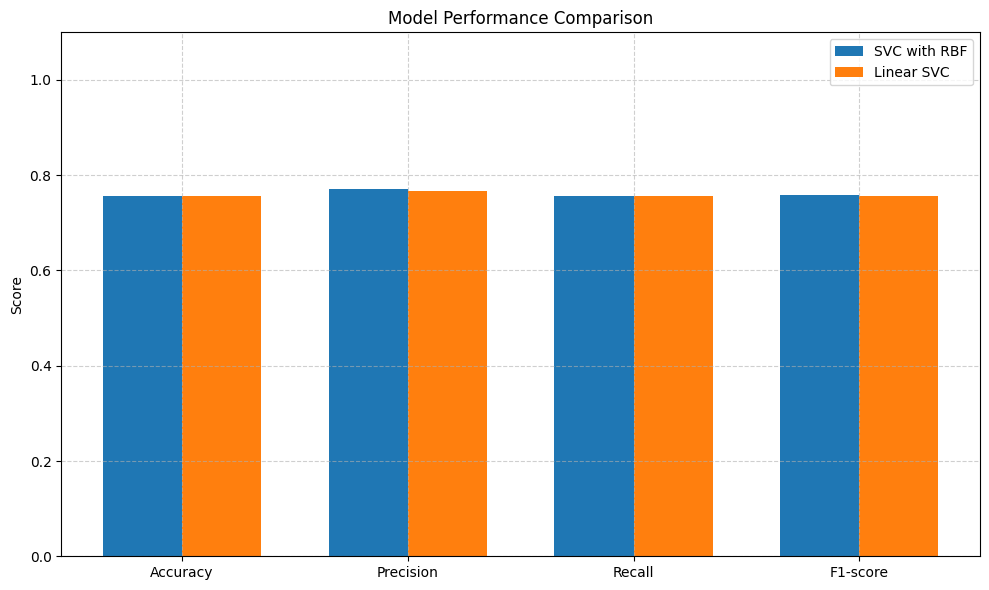

In [148]:
metrics_rbf = [
    accuracy_score(y_val, y_pred_rbf),
    precision_score(y_val, y_pred_rbf, average='weighted'),
    recall_score(y_val, y_pred_rbf, average='weighted'),
    f1_score(y_val, y_pred_rbf, average='weighted'),
]

metrics_linear = [
    accuracy_score(y_val, y_pred_linear),
    precision_score(y_val, y_pred_linear, average='weighted'),
    recall_score(y_val, y_pred_linear, average='weighted'),
    f1_score(y_val, y_pred_linear, average='weighted'),
]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_rbf, width, label='SVC with RBF')
plt.bar(x + width/2, metrics_linear, width, label='Linear SVC')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

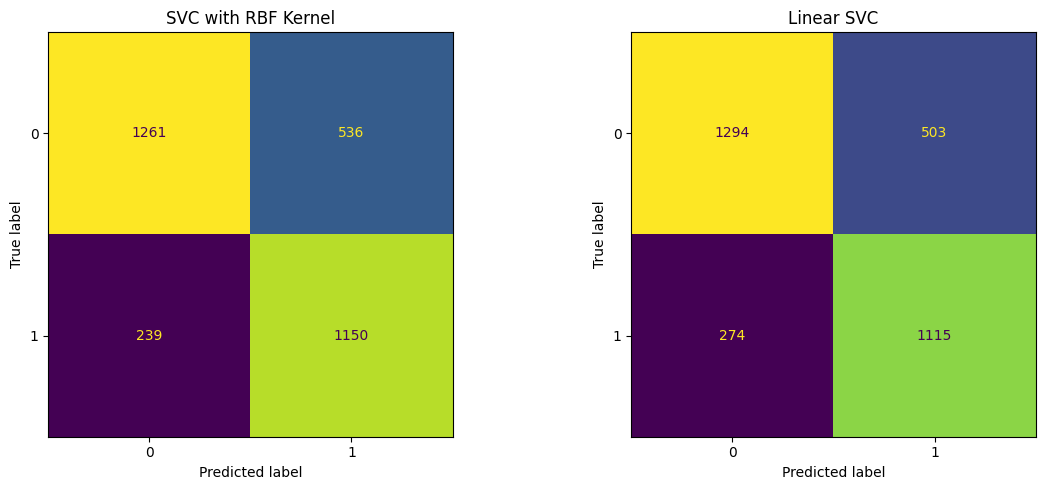

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rbf, ax=axs[0], colorbar=False)
axs[0].set_title("SVC with RBF Kernel")

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_linear, ax=axs[1], colorbar=False)
axs[1].set_title("Linear SVC")

plt.tight_layout()
plt.show()


# Saving the Best MODEL

In [41]:
# # save the model
# import joblib
# joblib.dump(best_svc, '//content/drive/MyDrive/Colab Notebooks/best_svc.pkl')